## E-Commerce US 2020

### Import Module

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Data Preparation

In [2]:
data = pd.read_csv('Dataset/e_commerce.csv')
data.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


### Attribute Information

1. Order Date : Tanggal Pemesanan (Datetime)
2. Row ID : Nomor Baris (Numeric)
3. Order ID : ID Pemesanan (String)
4. Ship Mode : Kelas Pengiriman (Category)
5. Customer ID : ID Pelanggan (String)
6. Segment : Segmentasi Pelanggan (Category)
7. Country : Negara (Category)
8. City : Kota (Category)
9. State : Negara Bagian (Category)
10. Postal Code : Kode Pos (Numeric)
11. Region : Wilayah (Category)
12. Product ID : ID Produk (String)
13. Category : Kategori Produk (Category)
14. Sub-Category : Sub Kategori Produk (Category)
15. Product Name : Nama Produk (String)
16. Sales : Nominal Penjualan (Numeric)
17. Quantity : Jumlah Barang (Numeric)
18. Discount : Persentase Diskon (Float)
19. Profit : Keuntungan

### Exploratory Data Analysis

In [3]:
data.shape

(3312, 19)

1. Jumlah baris dataset 3312
2. Jumlah kolom 19

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [5]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,5087.107488,56186.515097,221.381418,3.766908,0.156467,28.212340
std,2817.482266,31980.375516,585.257531,2.221776,0.207429,241.864342
min,13.000000,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2655.750000,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,5183.500000,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,7498.250000,90032.000000,205.105700,5.000000,0.200000,28.315125
max,9994.000000,99301.000000,13999.960000,14.000000,0.800000,6719.980800


#### Informasi yang kita dapatkan dari tabel di atas yaitu:
1. Nilai Row ID, dan Postal Code tidak dapat digunakan karena tidak mengandung makna
2. Jumlah diskon terbesar yang diberikan yaitu sebesar 80%
3. Beberapa transkasi perusahaan yang mengalami kerugian

In [6]:
data.describe(include='O')

,Order Date,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312
unique,322,1687,4,693,3,1,350,47,4,1525,3,17,1511
top,02-09-20,CA-2017-100111,Standard Class,SV-20365,Consumer,United States,New York City,California,West,FUR-CH-10003774,Office Supplies,Binders,Easy-staple paper
freq,36,14,1897,20,1668,3312,306,663,1095,8,2002,500,16


#### Informasi yang kita dapatkan dari tabel di atas yaitu:
1. Standard Class mendominasi Kelas pengiriman barang dengan jumlah 1897
2. Segmen untuk pasar Consumer mendominasi dengan jumlah 1668

In [7]:
data.isnull().sum()

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Tidak terdapat Missing Value dalam Dataset

In [8]:
data.pivot_table(values=['Sales', 'Profit'], index=['Category','Sub-Category'], aggfunc='sum')

Profit        Sales
Category        Sub-Category                         
Furniture       Bookcases      -583.6261   30024.2797
                Chairs         7643.5493   95554.3530
                Furnishings    4099.1628   28915.0940
                Tables        -8140.6947   60893.5425
Office Supplies Appliances     7865.2683   42926.9320
                Art            2221.9631    8863.0680
                Binders        7669.7418   72788.0450
                Envelopes      1441.7590    3378.5740
                Fasteners       304.9489     857.5940
                Labels         1744.6093    3861.2160
                Paper         12040.8434   27694.7180
                Storage        7402.8007   69677.6180
                Supplies       -955.3128   16049.4100
Technology      Accessories   15672.3570   59946.2320
                Copiers       25031.7902   62899.3880
                Machines      -2869.2156   43544.6750
                Phones        12849.3250  105340.5160

### Add New Columns

In [9]:
data['Order Month'] = data['Order Date'].str.slice(3)

In [10]:
data.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,01-20
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,01-20
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,01-20
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,01-20
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,01-20


### Monthly Sales

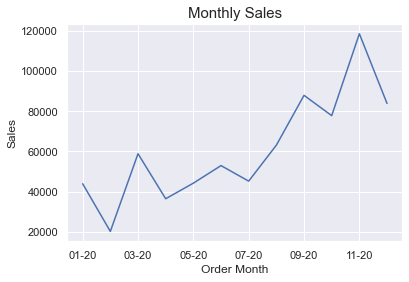

In [11]:
data.groupby('Order Month')['Sales'].sum().plot()
plt.title('Monthly Sales', fontsize=15)
plt.ylabel('Sales');

### Monthly Profit

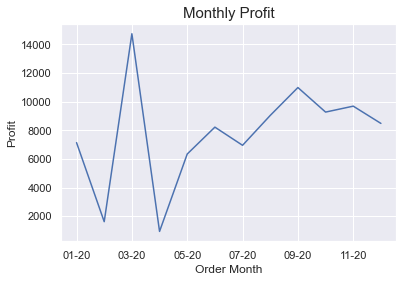

In [12]:
data.groupby('Order Month')['Profit'].sum().plot()
plt.title('Monthly Profit', fontsize=15)
plt.ylabel('Profit');

### Sales and Profit Comparison

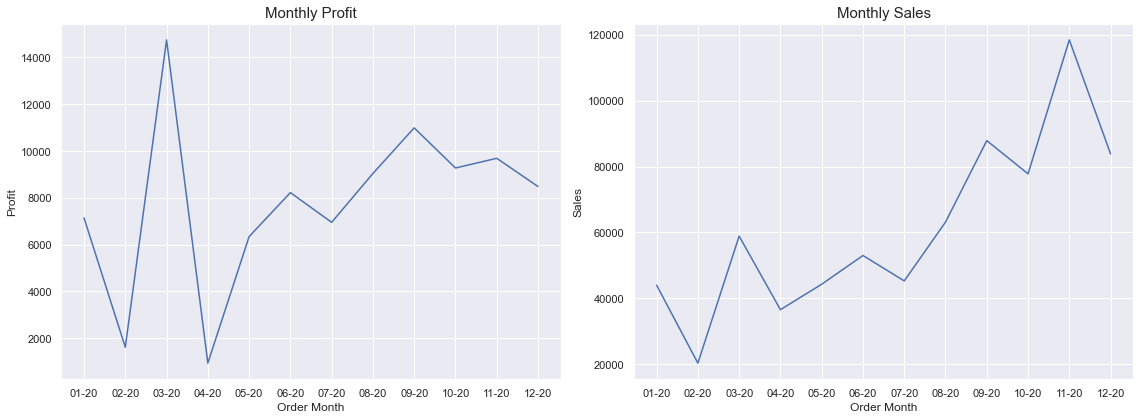

In [13]:
fig, axes = plt.subplots(1,2, figsize=(16,6), )
axes[0].plot(data.groupby('Order Month')['Profit'].sum())
axes[0].set_xlabel('Order Month')
axes[0].set_ylabel('Profit')
axes[0].set_title('Monthly Profit', fontsize=15)

axes[1].plot(data.groupby('Order Month')['Sales'].sum())
axes[1].set_xlabel('Order Month')
axes[1].set_ylabel('Sales')
axes[1].set_title('Monthly Sales', fontsize=15)
fig.tight_layout()
plt.show()

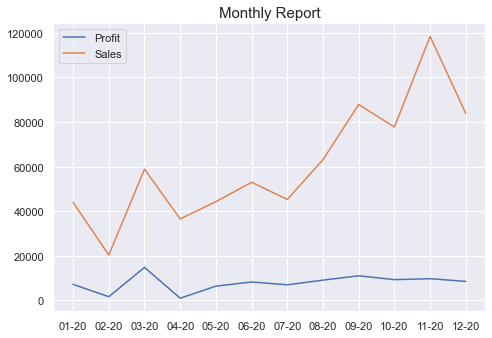

In [14]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(data.groupby('Order Month')['Profit'].sum(), label='Profit')
axes.plot(data.groupby('Order Month')['Sales'].sum(), label='Sales')
axes.set_title('Monthly Report', fontsize=15)
axes.legend(loc='best')
plt.show()

### Monthly Sales - Breakdown by Segment

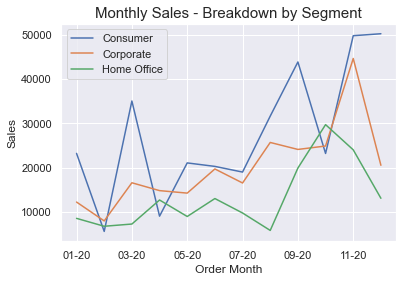

In [15]:
data.groupby(['Order Month', 'Segment'])['Sales'].sum().unstack().plot()
plt.title('Monthly Sales - Breakdown by Segment', fontsize=15)
plt.ylabel('Sales')
plt.xlabel('Order Month')
plt.legend(loc='best');

### Monthly Profit - Breakdown by Segment

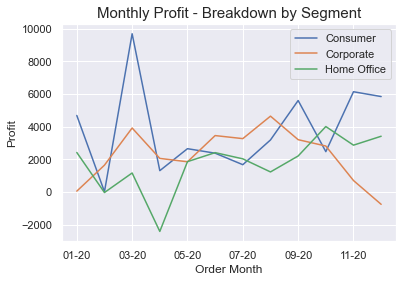

In [16]:
data.groupby(['Order Month', 'Segment'])['Profit'].sum().unstack().plot()
plt.title('Monthly Profit - Breakdown by Segment', fontsize=15)
plt.ylabel('Profit')
plt.xlabel('Order Month')
plt.legend(loc='best', );

### Sales and Profit Comparison - Breakdown by Segment

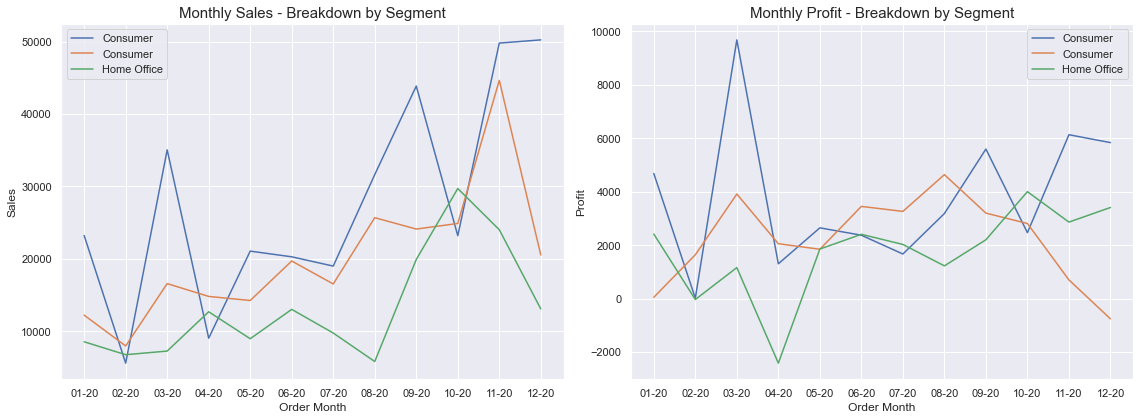

In [17]:
fig, axes = plt.subplots(1,2, figsize=(16,6), )
axes[0].plot(data.groupby(['Order Month', 'Segment'])['Sales'].sum().unstack())
axes[0].set_xlabel('Order Month')
axes[0].set_ylabel('Sales')
axes[0].set_title('Monthly Sales - Breakdown by Segment', fontsize=15)
axes[0].legend(data['Segment'])

axes[1].plot(data.groupby(['Order Month', 'Segment'])['Profit'].sum().unstack())
axes[1].set_xlabel('Order Month')
axes[1].set_ylabel('Profit')
axes[1].set_title('Monthly Profit - Breakdown by Segment', fontsize=15)
axes[1].legend(data['Segment'])
fig.tight_layout()
plt.show()

### Monthly Sales - Breakdown by Category

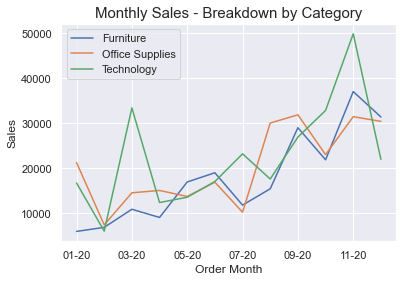

In [18]:
data.groupby(['Order Month', 'Category'])['Sales'].sum().unstack().plot()
plt.title('Monthly Sales - Breakdown by Category', fontsize=15)
plt.ylabel('Sales')
plt.xlabel('Order Month')
plt.legend(loc='best');

### Monthly Profit - Breakdown by Category

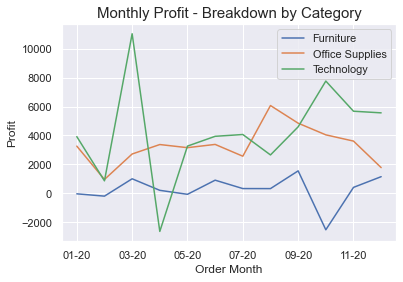

In [19]:
data.groupby(['Order Month', 'Category'])['Profit'].sum().unstack().plot()
plt.title('Monthly Profit - Breakdown by Category', fontsize=15)
plt.ylabel('Profit')
plt.xlabel('Order Month')
plt.legend(loc='best');

### Sales and Profit Comparison - Breakdown by Category

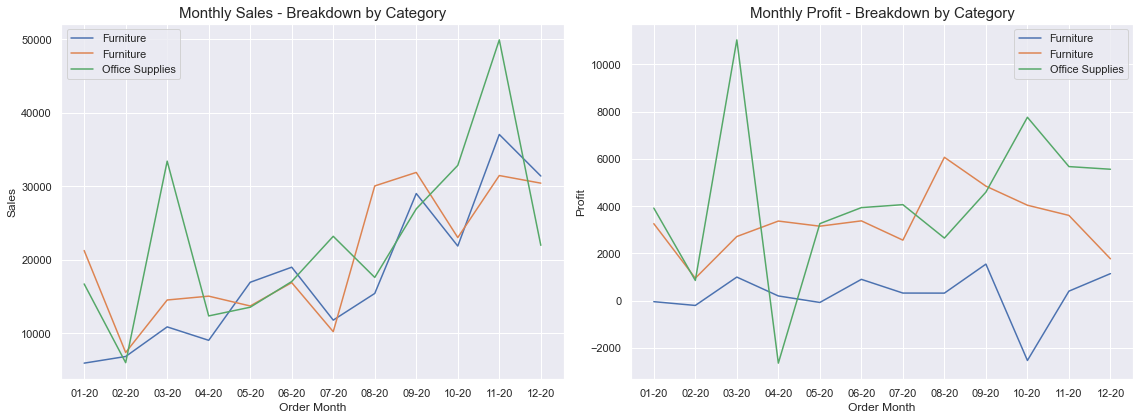

In [20]:
fig, axes = plt.subplots(1,2, figsize=(16,6), )
axes[0].plot(data.groupby(['Order Month', 'Category'])['Sales'].sum().unstack())
axes[0].set_xlabel('Order Month')
axes[0].set_ylabel('Sales')
axes[0].set_title('Monthly Sales - Breakdown by Category', fontsize=15)
axes[0].legend(data['Category'])

axes[1].plot(data.groupby(['Order Month', 'Category'])['Profit'].sum().unstack())
axes[1].set_xlabel('Order Month')
axes[1].set_ylabel('Profit')
axes[1].set_title('Monthly Profit - Breakdown by Category', fontsize=15)
axes[1].legend(data['Category'])
fig.tight_layout()
plt.show()

### Ship Mode

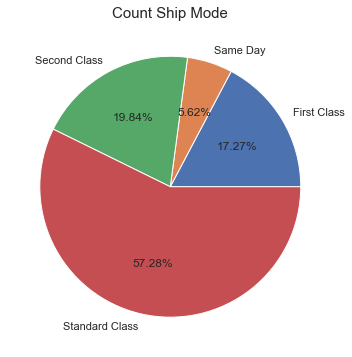

In [21]:
pie_chart = data.groupby('Ship Mode')['Profit'].count().reset_index()
plt.figure(figsize=(6,6))
plt.pie(pie_chart['Profit'], labels=pie_chart['Ship Mode'], autopct='%1.2f%%')
plt.title('Count Ship Mode', fontsize=15);

### Top 5 Sales by State

In [22]:
top_state_sales = (data.groupby('State')[['Sales','Profit']]
                   .sum()
                   .reset_index()
                   .sort_values(by='Sales', ascending=False)
                   .head(5))

In [23]:
top_state_sales

,State,Sales,Profit
3,California,146388.3445,29366.4589
29,New York,93922.9950,24357.0717
44,Washington,65539.8960,17256.7798
40,Texas,43421.7582,-8838.5049
35,Pennsylvania,42688.3060,-5112.8034


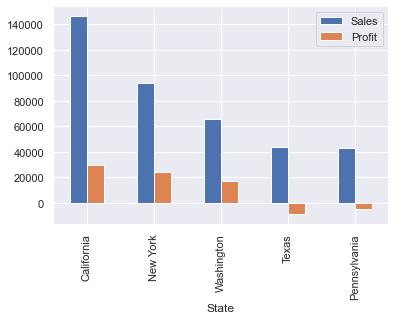

In [24]:
top_state_sales.plot(kind='bar', x='State', y=['Sales', 'Profit']);

### Top 5 Profit by State

In [38]:
top_state_profit = (data.groupby('State')[['Sales','Profit']]
                   .sum()
                   .reset_index()
                   .sort_values(by='Profit', ascending=False)
                   .head(5))

In [39]:
top_state_profit

,State,Sales,Profit
3,California,146388.3445,29366.4589
29,New York,93922.9950,24357.0717
44,Washington,65539.8960,17256.7798
19,Michigan,25833.6490,8487.7618
9,Georgia,19160.0200,6447.9819


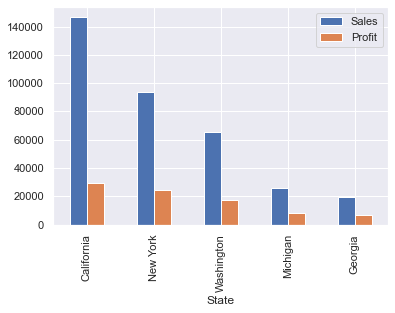

In [40]:
top_state_profit.plot(kind='bar', x='State', y=['Sales', 'Profit']);

### Top 5 Sales by City

In [41]:
top_city_sales = (data.groupby('City')[['Sales','Profit']]
                  .sum()
                  .reset_index()
                  .sort_values(by='Sales', ascending=False)
                  .head(5))

In [42]:
top_city_sales

,City,Sales,Profit
216,New York City,86939.6010,22406.0271
300,Seattle,56990.8200,15518.6970
174,Los Angeles,48875.6925,10059.2901
249,Philadelphia,41595.5020,-4995.0863
291,San Francisco,37197.5510,6617.9550


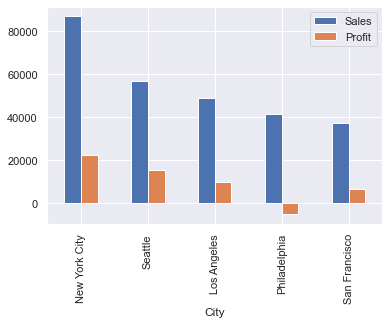

In [43]:
top_city_sales.plot(kind='bar', x='City', y=['Sales', 'Profit']);

### Top 5 Profit by City

In [45]:
top_city_profit = (data.groupby('City')[['Sales','Profit']]
                   .sum()
                   .reset_index()
                   .sort_values(by='Profit', ascending=False)
                   .head(5))

In [46]:
top_city_profit

,City,Sales,Profit
216,New York City,86939.6010,22406.0271
300,Seattle,56990.8200,15518.6970
174,Los Angeles,48875.6925,10059.2901
291,San Francisco,37197.5510,6617.9550
217,Newark,13808.4680,5468.2674


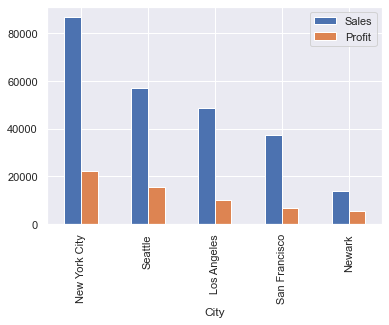

In [47]:
top_city_profit.plot(kind='bar', x='City', y=['Sales', 'Profit']);

### Top 10 Customer by Sales

In [31]:
top_10_cust_sales = (data.groupby('Customer ID')[['Sales','Profit']]
                            .sum()
                            .reset_index()
                            .sort_values(by='Sales', ascending=False)
                            .head(10))

In [32]:
top_10_cust_sales

,Customer ID,Sales,Profit
543,RB-19360,14203.278,6780.8963
636,TA-21385,13723.498,4599.2073
291,HL-15040,10522.550,5045.8564
627,SV-20365,8459.936,1570.3889
275,GT-14635,8167.420,-3825.3394
297,HW-14935,8166.354,1946.6943
667,TS-21370,6702.293,1218.0071
574,RW-19540,6193.446,1660.8355
521,PK-19075,5979.136,1617.3954
376,KF-16285,5825.462,1206.5566


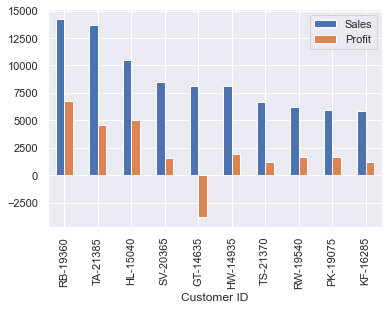

In [33]:
top_10_cust_sales.plot(kind='bar', x='Customer ID', y=['Sales', 'Profit']);

### Top 10 Customer by Profit

In [34]:
top_10_cust_profit = (data.groupby('Customer ID')[['Sales','Profit']]
                      .sum()
                      .reset_index()
                      .sort_values(by='Profit', ascending=False)
                      .head(10))

In [35]:
top_10_cust_profit

,Customer ID,Sales,Profit
543,RB-19360,14203.278,6780.8963
291,HL-15040,10522.550,5045.8564
636,TA-21385,13723.498,4599.2073
43,AR-10540,5820.580,2607.6814
362,JW-15220,5384.548,1953.2680
297,HW-14935,8166.354,1946.6943
86,BM-11650,5683.374,1938.1873
14,AD-10180,5433.890,1866.9279
314,JE-15610,4074.028,1703.5561
621,SR-20740,3505.840,1676.3122


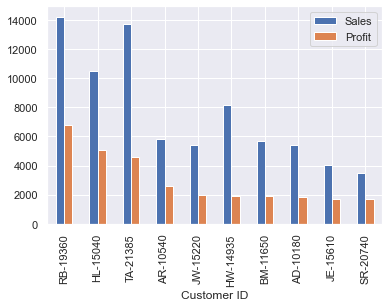

In [36]:
top_10_cust_profit.plot(kind='bar', x='Customer ID', y=['Sales', 'Profit']);